
**In this assignment students need to predict whether a person makes over  50K per year or not from classic adult dataset using XGBoost.**


The  description of the dataset is as follows: 
Data Set Information: 

Extraction was done by Barry Becker from the 1994 Census  database. A set of reasonably clean records was extracted using the  following conditions: 

((AAGE>16) && (AGI>100) &&  (AFNLWGT>1)&& (HRSWK>0)) 

Attribute Information: 

Listing of attributes: >50K, <=50K. 

**age:** continuous. 

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,  Local-gov, 

**State-**gov, Without-pay, Never-worked. 

**fnlwgt:** continuous. 

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school,  Assoc-acdm, 

Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,  Doctorate, 5th-6th, 
Preschool. 
education-num: continuous.

**marital-status:** Married-civ-spouse, Divorced, Never-married,  Separated, 

Widowed, Married-spouse-absent, Married-AF-spouse. 

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec managerial, 

**Prof-** specialty, Handlers-cleaners, Machine-op-inspct,  Adm-clerical, 

Farming-fishing, Transport-moving, Priv-house-serv,  Protective-serv, 

Armed-Forces. 

**Relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative,  
 
 Unmarried. 

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

**Sex:** Female, Male. 

**capital-gain:** continuous. 

**capital-loss:** continuous. 

**hours-per-week:** continuous. 

**Native-country:** United-States, Cambodia, England, Puerto-Rico,  Canada, 

Germany, Outlying-US(Guam-USVI-etc), India, Japan,  Greece, South, China, Cuba, 

Iran, Honduras, Philippines, Italy,  Poland, Jamaica, Vietnam, Mexico, 

Portugal, Ireland, France,  Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, 

Columbia,  Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El 

Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 


**Importing Important libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier

In [22]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',  'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',  'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,names=col_labels)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None,names=col_labels) 


In [23]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


**Data Exploration**

In [25]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

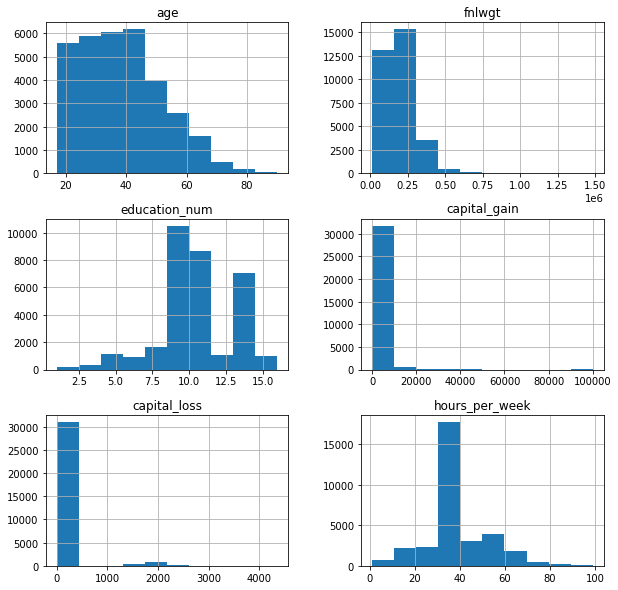

In [26]:
train_set.hist(figsize=(10,10))
plt.show()

In [27]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [28]:
train_set['workclass'].dtype=='object'
train_set['workclass'].value_counts()
#col=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','wage_class']

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [29]:
for feature in col_labels:
    if train_set[feature].dtype =='object':
        
         print('_'*10,feature, end=" ",)
         print('_'*10)
         print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

**Here we want to tackle the ? problem we want fix the problem .**

Features Native_counrty, Occupation, workclass having '?' as one value need to be handle

In [30]:
index_no = [] # will contain three index series of desired syntexes
def questionMark_index(features):
    
    for item in features:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        index_no.append(index)
        print("Total no of `?` in {}: {}".format(item, index.value_counts().sum()))  # sum of those indexes 
        
features= ['workclass','occupation', 'native_country']
questionMark_index(features)

__________ workclass __________
Total no of `?` in workclass: 1836
__________ occupation __________
Total no of `?` in occupation: 1843
__________ native_country __________
Total no of `?` in native_country: 583


In [31]:
print("Original Shape of Train Set:", train_set.shape)

Original Shape of Train Set: (32561, 15)


In [32]:
print('\n Drowping `?` indexes from `workclass` featutre....')
index1= train_set[train_set["workclass"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `workclass` featutre....
Total New rows: 30725


In [33]:
print('\n Drowping `?` indexes from `native_country` featutre....')
index2= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `native_country` featutre....
Total New rows: 30169


In [34]:
print('\n Drowping `?` indexes from `occupaction` featutre....')
index3= train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index3)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `occupaction` featutre....
Total New rows: 30162


In [35]:
questionMark_index(features)

__________ workclass __________
Total no of `?` in workclass: 0
__________ occupation __________
Total no of `?` in occupation: 0
__________ native_country __________
Total no of `?` in native_country: 0


In [36]:
train_set.shape

(30162, 15)

**Now for applying XG Boost we convert categorical variable into integer by using one hot encoding**

In [37]:
df1 = train_set.copy()                       

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])  #Take all column except last one or target variable.

In [38]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [39]:
X_train = pd.concat([df1, df2], axis=1)

In [40]:
X_train.shape 

(30162, 104)

In [41]:
X_train.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,...,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0,0,13
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0,0,40
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0,0,40
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0,40


In [43]:
y=train_set[objectFeature[-1]]
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: wage_class, dtype: object

In [50]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
Y_train=label.fit_transform(y)   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train


In [51]:
Y_train

array([0, 0, 0, ..., 0, 0, 1])

**We do same for test data set but here we can use train dataset to buliding the model.**

**XGBoost Classifer**

In [49]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [53]:
x_train, x_test, y_train, y_test =train_test_split(X_train, Y_train, test_size=.30)

In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21113, 104), (9049, 104), (21113,), (9049,))

**First Model without hypertunning**

In [55]:
xgb = XGBClassifier(**params).fit(x_train,y_train)

In [56]:
y_pred= xgb.predict(x_test)

In [58]:
accuracy_score(y_test, y_pred)

0.8709249640844292

**Second Model with hypertunning**

In [59]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid={
   
    ' learning_rate':[1,0.5],
    'max_depth': [3,5],
    'n_estimators':[10,50]
    
}

In [65]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [66]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.844, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.837, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.841, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.839, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.857, total=   2.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.853, total=   2.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.851, total=   2.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.853, total=   2.1s
[CV]  l

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5], 'max_depth': [3, 5],
                         'n_estimators': [10, 50]},
             pre_dispatch='2*n_jobs', refit=True

In [67]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}

In [69]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=50, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [70]:
y_pred_new = new_model.predict(x_test)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(y_test,predictions_new)
accuracy_new

0.8610896231627804